In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
import pymc3 as pm
sns.plt = plt

In [126]:
def modelator_binomial(n, observed, beta1, beta2, n_iteraciones):
    model1 = pm.Model()
    with model1:
        theta = pm.Beta('theta', beta1, beta2)
        k = pm.Binomial('k',p=theta, n=n, observed=observed)
        p1 = pm.sample()
        ax1 = pm.plot_posterior(p1)
        ax1.set_title("Posterior plot para %d caras en %d tiradas en una distribucion Beta(%d,%d)" % (observed, n, beta1, beta2))
        ax1.set_xlabel("Theta")
        ax2 = pm.traceplot(p1)
        ax2[0][0].set_title("Frecuencias")
        ax2[0][1].set_title("Sampleos")
        plt.show()
        
        map_estimate1 = pm.find_MAP(model=model1)
        
        k_observados = pm.Bernoulli('k_observados', p=theta)

        trace = pm.sample(n_iteraciones, step=pm.Metropolis(), progressbar=True)
        
        
        print "MAP:" + str(map_estimate1['theta'])
        print "La media es mostrada en el gráfico"
        print "PREDICCION"
        print("Probabilidad de cara luego de "+ str(n_iteraciones) +" iteraciones : " + str((sum(trace['k_observados']) / float(n_iteraciones))))

# Ejercicios 1, 2, 3 y 4:
Calculamos la posterior de ambos modelos, el MAP y las predicciones para 3, 6 y 20 caras.
Para la predicción, utilizamos una distribución de Bernoulli y fijamos 5000 iteraciones.

## Beta(1,1):

### 3 caras en 3 tiradas

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:01<00:00, 679.85it/s]


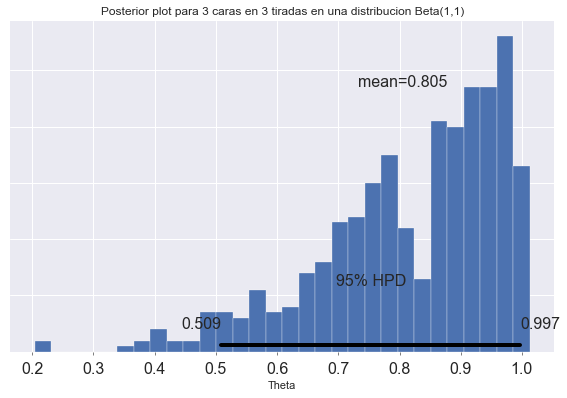

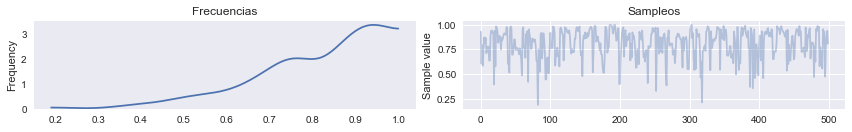

logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 1811.05it/s]  
100%|██████████| 5500/5500 [00:02<00:00, 2582.90it/s]

MAP:0.999996924164
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.793


In [127]:
modelator_binomial(3,3, 1,1,5000)

### 6 caras en 6 tiradas

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1277.33it/s]


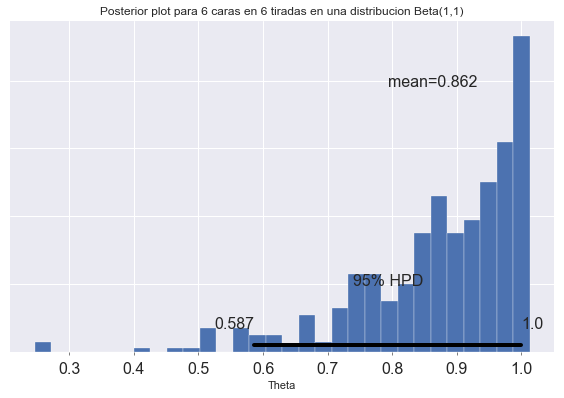

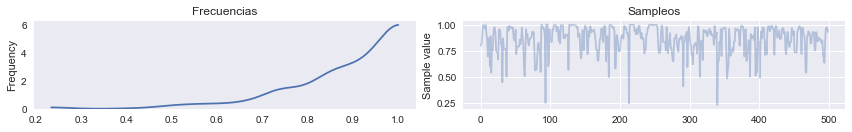

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1612.51it/s]  
100%|██████████| 5500/5500 [00:01<00:00, 3196.77it/s]

MAP:0.999998462083
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.8748


In [128]:
modelator_binomial(6,6, 1,1,5000)

### 20 caras en 20 tiradas

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 86%|████████▋ | 865/1000 [00:00<00:00, 1437.59it/s]/usr/local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1000/1000 [00:00<00:00, 1483.92it/s]


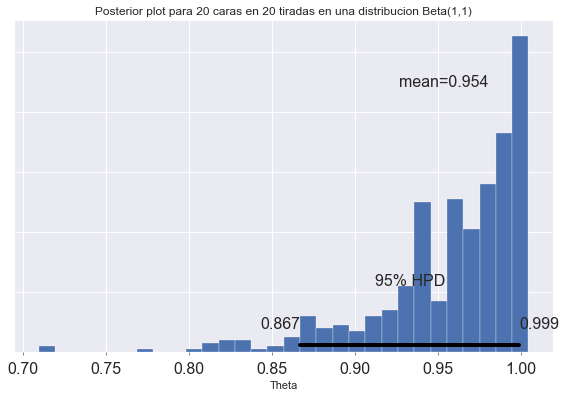

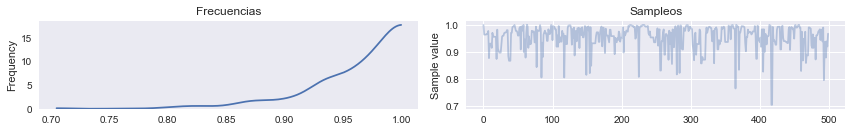

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 1619.56it/s]  
100%|██████████| 5500/5500 [00:02<00:00, 2709.86it/s]

MAP:0.999999615521
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.9452


In [129]:
modelator_binomial(20,20,1,1,5000)

## Beta(50,50):
Nota: Utilizamos Beta(50,50) ya que con 100 no funcionaba

### 3 caras en 3 tiradas

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1212.47it/s]


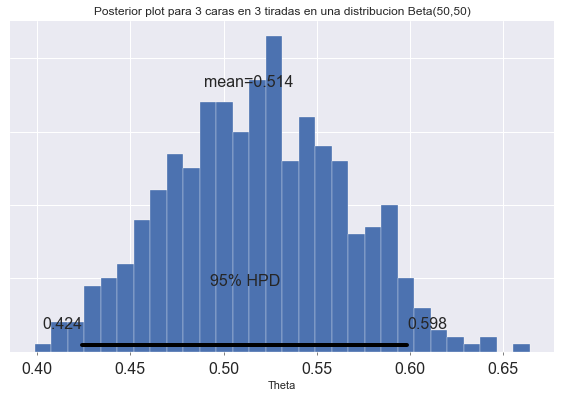

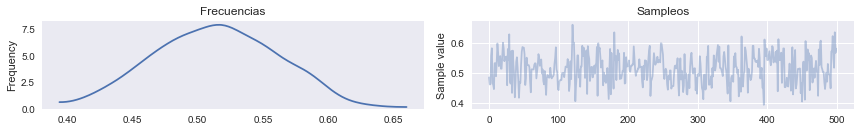

logp = -0.0051492, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 1034.82it/s]
100%|██████████| 5500/5500 [00:02<00:00, 2304.69it/s]

MAP:0.514851485143
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.516


In [130]:
modelator_binomial(3,3,50,50,5000)

### 6 caras en 6 tiradas

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1565.83it/s]


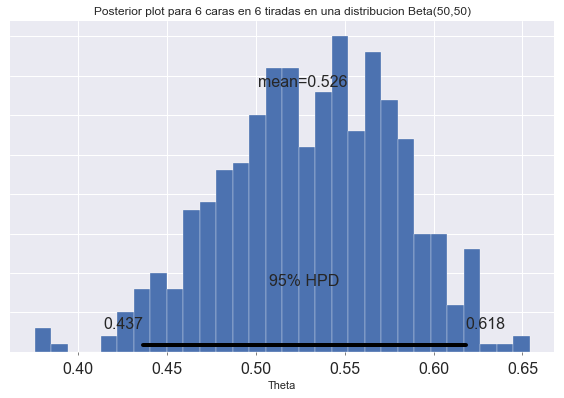

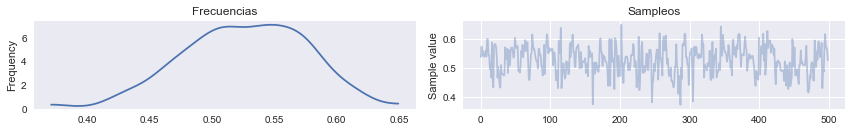

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1342.03it/s]
100%|██████████| 5500/5500 [00:01<00:00, 2796.50it/s]

MAP:0.528846153741
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.5488


In [131]:
modelator_binomial(6,6, 50,50,5000)

### 20 caras en 20 tiradas


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1157.88it/s]


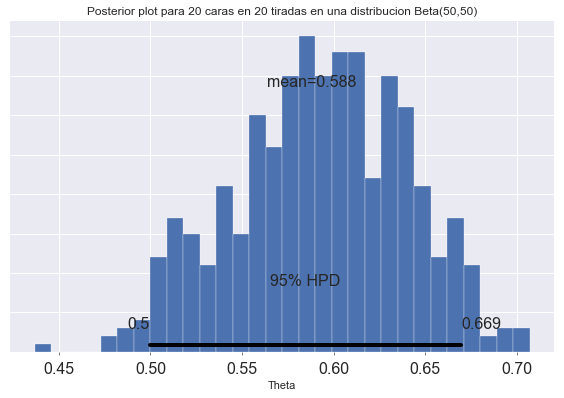

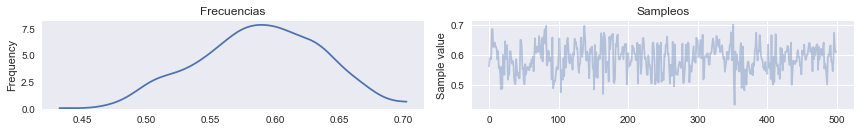

logp = -11.789, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1395.39it/s]
100%|██████████| 5500/5500 [00:02<00:00, 2710.35it/s]


MAP:0.584745760743
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.5584


In [132]:
modelator_binomial(20,20, 50,50,5000)

Viendo los resultados en los distintos priors elegidos, se puede ver claramente como influye el conocimiento previo supuesto sobre la moneda en los resultados.

En el caso de Beta(1,1), es debil el conocimiento y ya con pocas observaciones podemos ver como se desequilibra la distribución y las predicciones al aumentar la cantidad de tiradas con mismo resultado observado. En concreto, solo con considerar 3 tiradas de las cuales todas salieron cara, basta para que la distribución tenga media 0.8. Luego al aumentar la cantidad de tiradas con resultado cara, este desplazamiento se vuelve cada vez mayor.

Por otro lado, en el caso de la Beta(50,50) es mucho más fuerte la suposición de que la moneda está equilibrada y esto implica que sea mucho más suave el cambio al agregar tiradas, es más resistente al cambio. Cabe notar, que recién en el experimento de 20 tiradas, la distribución se desplaza de forma visible.

En cuanto al modelo, nos parece que es mucho más apropiado para el caso que la estadística frecuentista, ya que, por ejemplo, no voy a tener la misma confianza en una moneda dada directamente del banco que en una moneda provista por un casino, o por una persona en la calle que quiere apostar.

# Ejercicio 5:

Este ejercicio nos está pidiendo basicamente que nosotros definamos un prior dadas nuestras creencias. Nosotros consideramos que podemos sospechar que la moneda está cargada luego de observar 5 caras en 5 tiradas (algo que debería suceder una de 32 veces en una moneda equilibrada). Buscamos parametros para la Beta que se desplacen considerbalemente en ese valor.

Encontramos que con Beta(5,5) la media luego de 5 tiradas con cara se corre a 0.66 aproximadamente y la probabilidad de cara también. Consideramos que con esa probabilidad, sería muy notorio en el mundo real que la moneda está cargada porque saldría cara dos tercios de las veces que se tira.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 94%|█████████▍| 941/1000 [00:00<00:00, 1172.42it/s]/usr/local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.894006650576, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1000/1000 [00:00<00:00, 1188.68it/s]


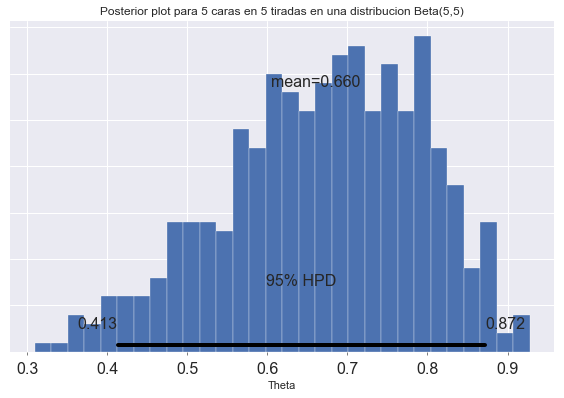

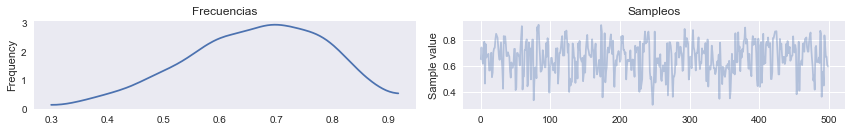

logp = -2.5652, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1447.14it/s]
100%|██████████| 5500/5500 [00:01<00:00, 2846.57it/s]


MAP:0.692308440617
La media es mostrada en el gráfico
PREDICCION
Probabilidad de cara luego de 5000 iteraciones : 0.6814


In [133]:
modelator_binomial(5,5,5,5,5000)